# G01
# Cristina Molina
# Jaime del Rey

# Índice
  - [Carga y descripción](#Carga-y-descripción)
  - [Árboles de decisión](#Árboles-de-decisión)
  - [Matriz de confusión](#Matriz-de-confusión)
  - [K-NN](#K-NN)
  - [Normalización](#Normalizacion)
  - [Análisis de los resultados](#Análisis-de-los-resultados)

# Carga y descripción

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
np.seterr(divide='ignore', invalid='ignore')
dic_tumor = load_breast_cancer() #diccionario cuyos datos son un array de arrays

In [2]:
(len(dic_tumor.data),len(dic_tumor.data[0])) #dimensiones de los datos del diccionario
                                           #(solo los numericos)

(569, 30)

In [3]:
dic_tumor.keys() #las claves del diccionario

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
list(dic_tumor.feature_names)

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [5]:
dic_tumor.target #las clases en que estan divididos los tumores

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
list(dic_tumor.target_names)

['malignant', 'benign']

In [7]:
data = np.c_[dic_tumor.data, dic_tumor.target]
columns = np.append(dic_tumor['feature_names'], ["target"])
df = pd.DataFrame(data, columns=columns)
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,568
mean radius,17.990000,20.570000,19.690000,11.420000,20.290000,12.450000,18.250000,13.710000,13.000000,12.460000,...,11.510000,14.050000,11.200000,15.220000,20.920000,21.560000,20.130000,16.600000,20.600000,7.760000
mean texture,10.380000,17.770000,21.250000,20.380000,14.340000,15.700000,19.980000,20.830000,21.820000,24.040000,...,23.930000,27.150000,29.370000,30.620000,25.090000,22.390000,28.250000,28.080000,29.330000,24.540000
mean perimeter,122.800000,132.900000,130.000000,77.580000,135.100000,82.570000,119.600000,90.200000,87.500000,83.970000,...,74.520000,91.380000,70.670000,103.400000,143.000000,142.000000,131.200000,108.300000,140.100000,47.920000
mean area,1001.000000,1326.000000,1203.000000,386.100000,1297.000000,477.100000,1040.000000,577.900000,519.800000,475.900000,...,403.500000,600.400000,386.000000,716.900000,1347.000000,1479.000000,1261.000000,858.100000,1265.000000,181.000000
mean smoothness,0.118400,0.084740,0.109600,0.142500,0.100300,0.127800,0.094630,0.118900,0.127300,0.118600,...,0.092610,0.099290,0.074490,0.104800,0.109900,0.111000,0.097800,0.084550,0.117800,0.052630
mean compactness,0.277600,0.078640,0.159900,0.283900,0.132800,0.170000,0.109000,0.164500,0.193200,0.239600,...,0.102100,0.112600,0.035580,0.208700,0.223600,0.115900,0.103400,0.102300,0.277000,0.043620
mean concavity,0.300100,0.086900,0.197400,0.241400,0.198000,0.157800,0.112700,0.093660,0.185900,0.227300,...,0.111200,0.044620,0.000000,0.255000,0.317400,0.243900,0.144000,0.092510,0.351400,0.000000
mean concave points,0.147100,0.070170,0.127900,0.105200,0.104300,0.080890,0.074000,0.059850,0.093530,0.085430,...,0.041050,0.043040,0.000000,0.094290,0.147400,0.138900,0.097910,0.053020,0.152000,0.000000
mean symmetry,0.241900,0.181200,0.206900,0.259700,0.180900,0.208700,0.179400,0.219600,0.235000,0.203000,...,0.138800,0.153700,0.106000,0.212800,0.214900,0.172600,0.175200,0.159000,0.239700,0.158700
mean fractal dimension,0.078710,0.056670,0.059990,0.097440,0.058830,0.076130,0.057420,0.074510,0.073890,0.082430,...,0.065700,0.061710,0.055020,0.071520,0.068790,0.056230,0.055330,0.056480,0.070160,0.058840


In [8]:
tipos = pd.DataFrame(data = df.dtypes).transpose()
tipos

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [9]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Se separan en dos clases, tumores malignos o benignos.

In [10]:
dfMat = df.loc[:,['target']]

In [11]:
#dic_target = {0: 'Benigno', 1: 'Maligno'} Al ser variables numéricas todas no me deja renombrar
#df['target'] = df['target'].map(dic_target)
#df.transpose()

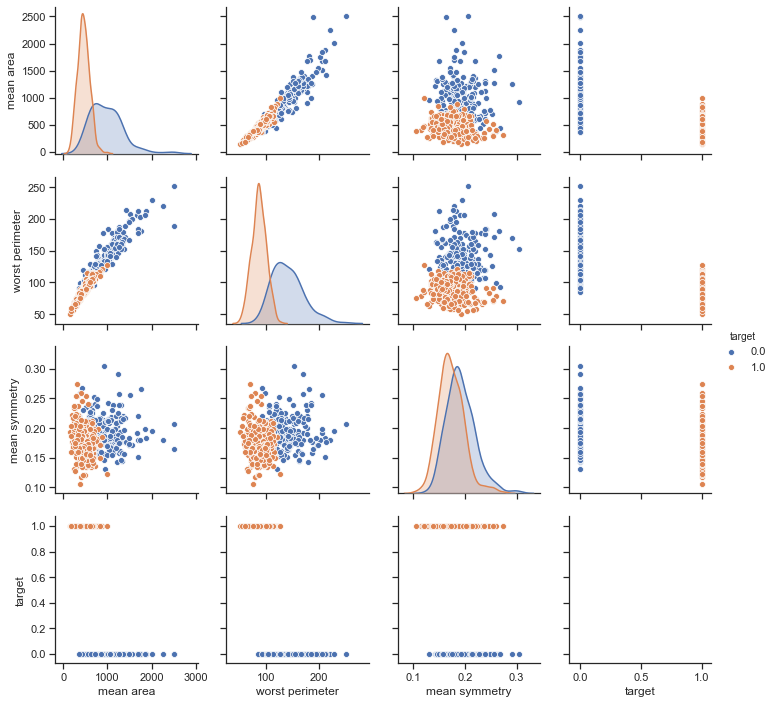

In [15]:
import seaborn as sns
sns.set(style="ticks")
var = df[['mean area','worst perimeter','mean symmetry','target']]

sns.pairplot(var, hue="target")

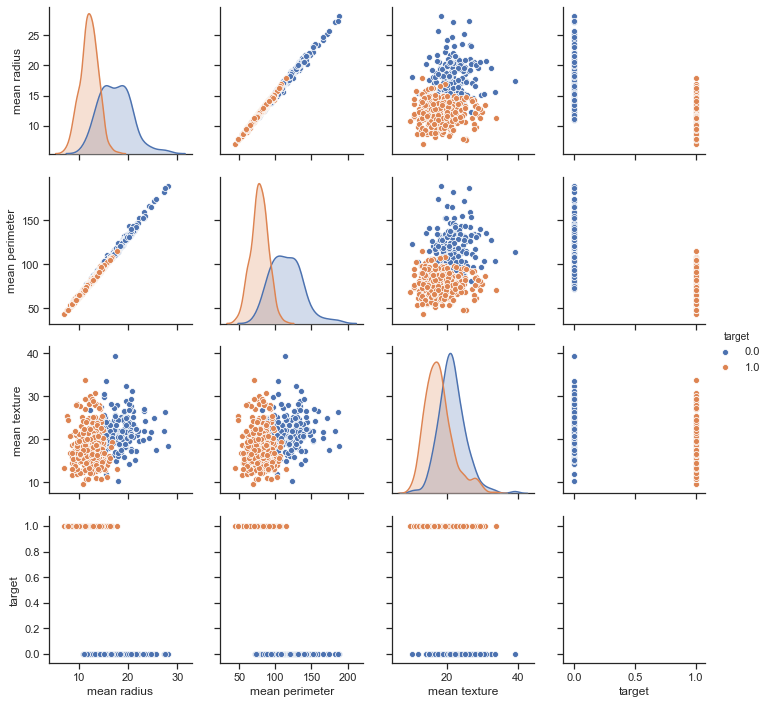

In [16]:
var = df[['mean radius','mean perimeter','mean texture','target']]

sns.pairplot(var, hue="target")

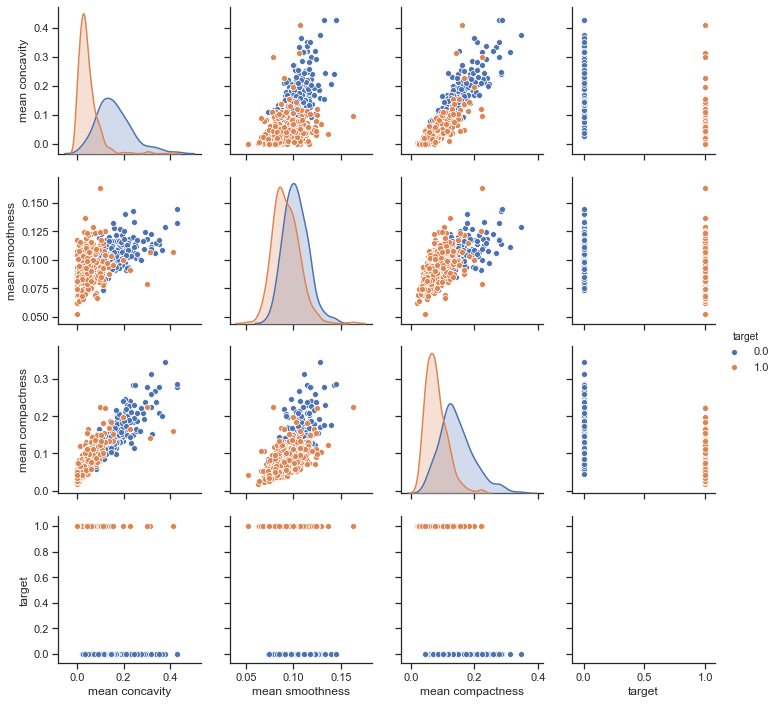

In [17]:
var = df[['mean concavity','mean smoothness','mean compactness','target']]

sns.pairplot(var, hue="target")

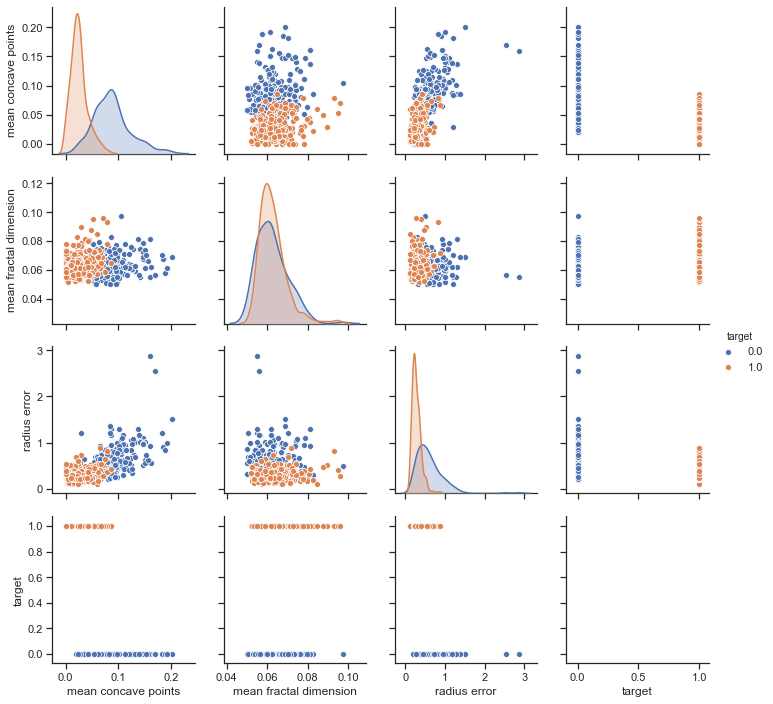

In [18]:
var = df[['mean concave points','mean fractal dimension','radius error','target']]

sns.pairplot(var, hue="target")

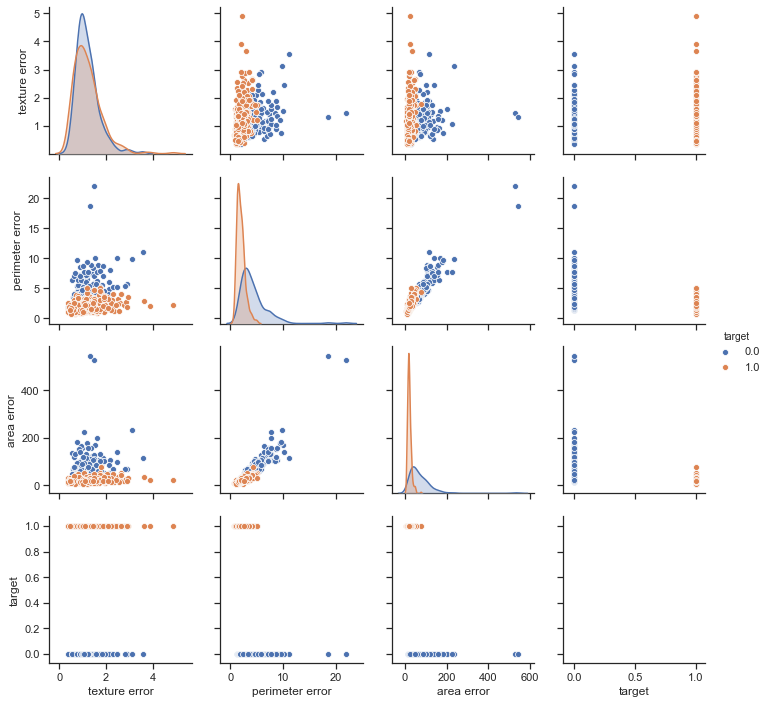

In [19]:
var = df[['texture error','perimeter error','area error','target']]

sns.pairplot(var, hue="target")

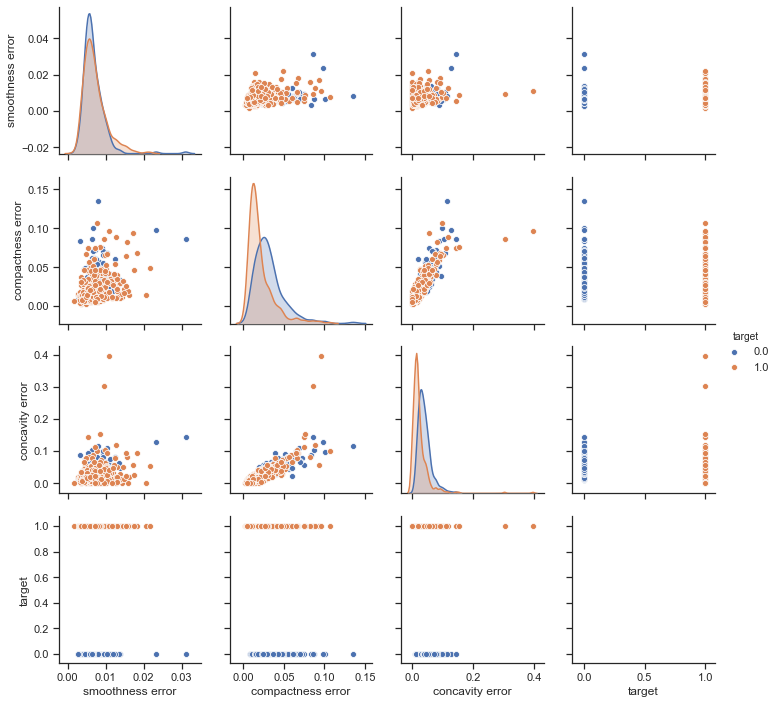

In [20]:
var = df[['smoothness error','compactness error','concavity error','target']]

sns.pairplot(var, hue="target")

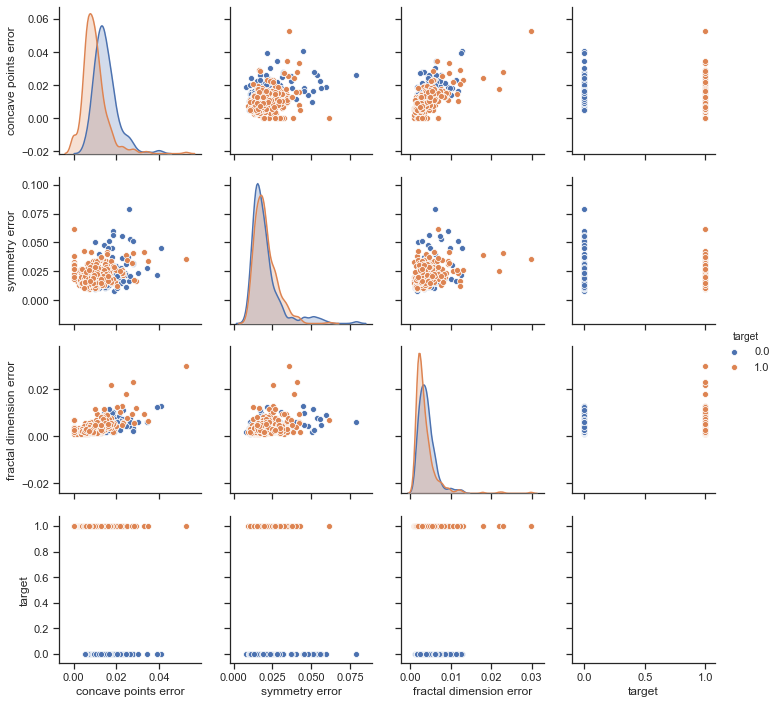

In [21]:
var = df[['concave points error','symmetry error','fractal dimension error','target']]

sns.pairplot(var, hue="target")

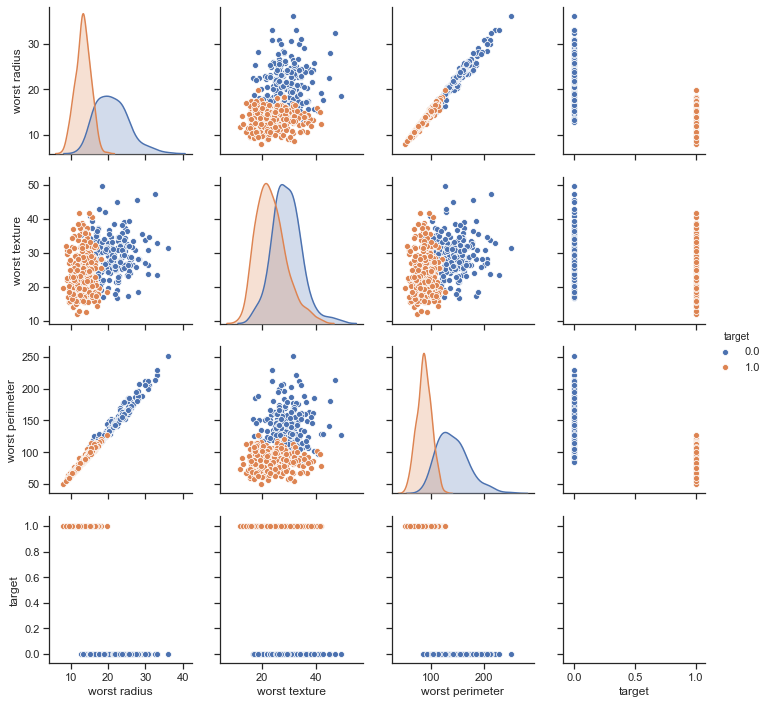

In [22]:
var = df[['worst radius','worst texture','worst perimeter','target']]

sns.pairplot(var, hue="target")

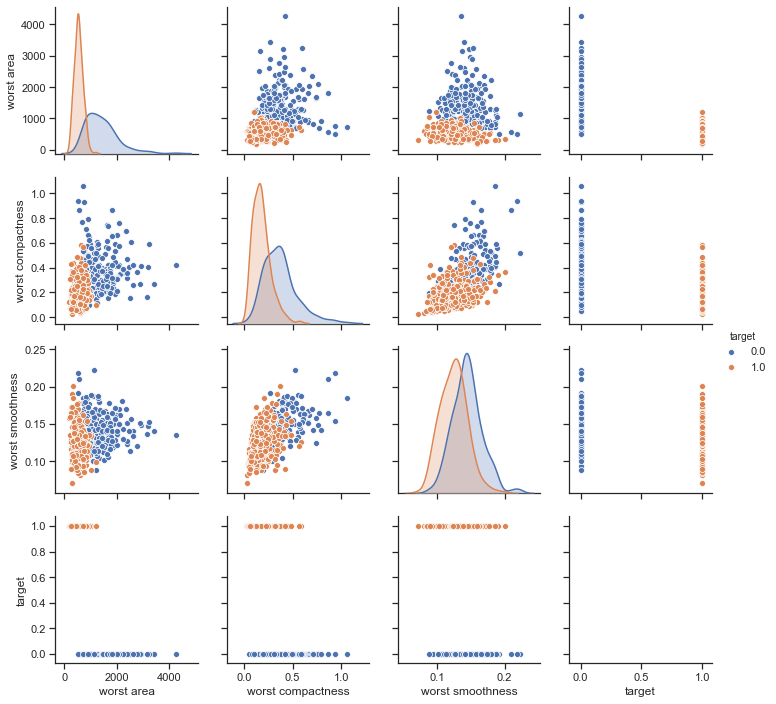

In [23]:
var = df[['worst area','worst compactness','worst smoothness','target']]

sns.pairplot(var, hue="target")

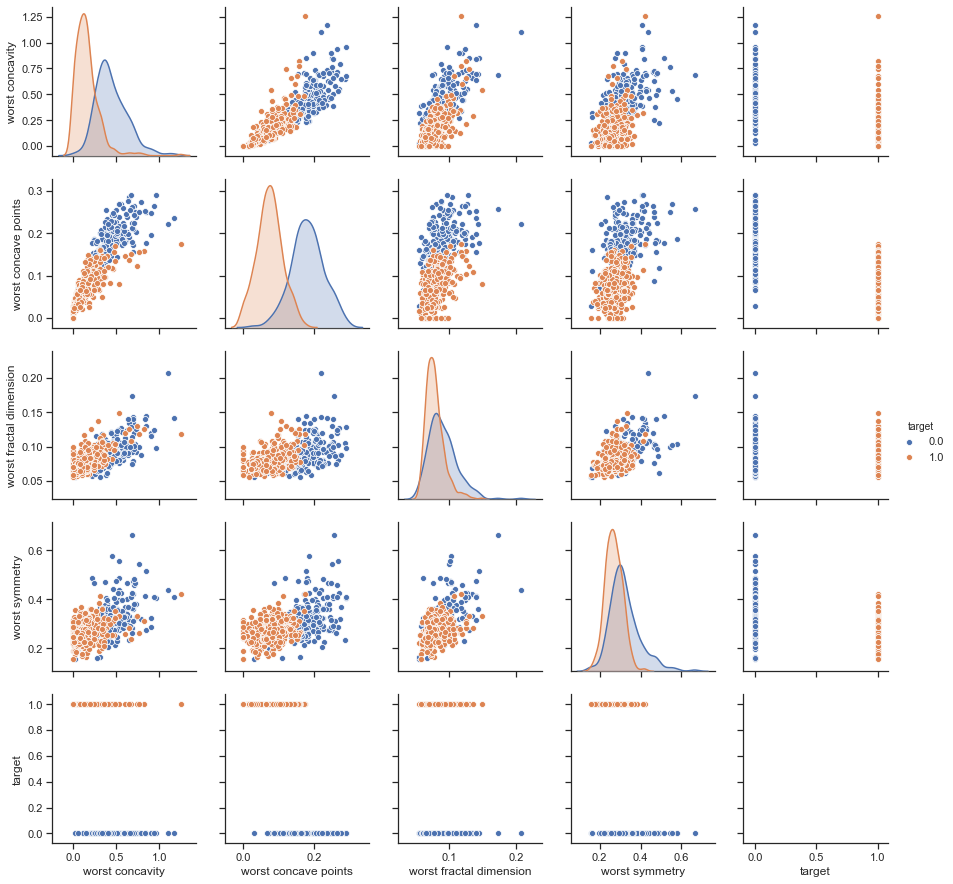

In [24]:
var = df[['worst concavity','worst concave points','worst fractal dimension','worst symmetry', 'target']]

sns.pairplot(var, hue="target")

En los diferentes gráficos que se muestran arriba podemos ver como están distribuidas las clases según las variables. Podemos observar que mientras que hay variables que separan muy bien las dos clases como por ejemplo worst error, worst radius, mean concavity... Hay otras que no separan nada bien las clases como por ejemplo symmetry error, texture error...

Un árbol de decisión se encarga de hacer preguntas determinadas a las variables para conseguir tener los nodos más puros posibles, en cada nodo se pregunta por el valor de una variable y en función de esa pregunta separa. Para conseguir estos datos necesitamos el valor real de la variable por lo que no es necesario normalizar ya que no se le está dando más peso a ninguna variable en concreto. Para los arboles de decisión no es necesario normalizar los datos.

# Árboles de decisión

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#Damos un 30% de los datos para el test
X_train, X_test, Y_train, Y_test = train_test_split(dic_tumor.data, dic_tumor.target, test_size = 0.3, random_state = 0)

#primero calculamos el arbol sin modificar los parámetros de aprendizaje del árbol
arbol = DecisionTreeClassifier()
arbol = arbol.fit(X_train, Y_train)

train_accuracy = arbol.score(X_train, Y_train)
test_accuracy = arbol.score(X_test, Y_test)

train_accuracy, test_accuracy

(1.0, 0.9122807017543859)

Vamos a repetir el proceso de crear el árbol cambiando los parámetros de aprendizaje del árbol. Por defecto tenemos como criterio gini, tenemos que fijar la maxima profundidad, el número mínimo de muestras para poder separar un nodo, ...
Vamos a limitar la profundidad máxima del árbol para poder generalizar mejor los datos nuevos. Usamos validación cruzada para calcular la profundidad óptima.

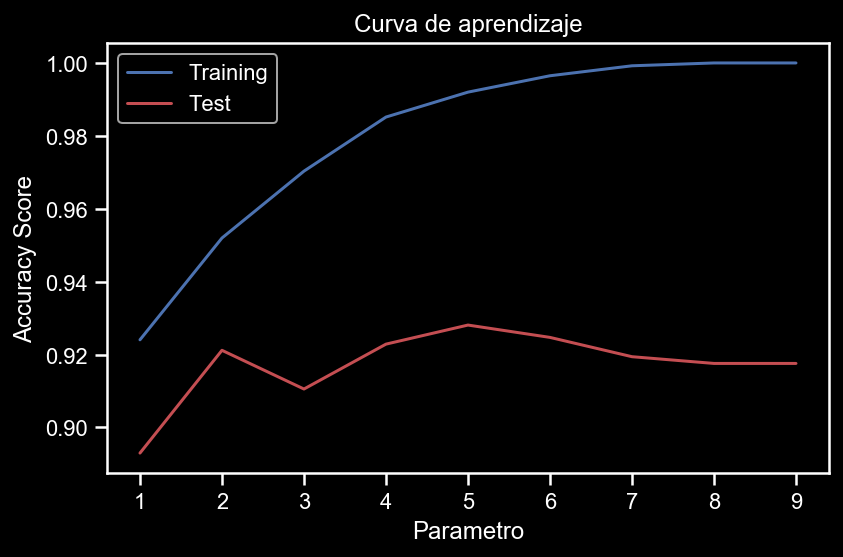

In [58]:
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

#Definimos dos vectores para poder guardar los datos según la profundidad
train_accuracy =[]
test_accuracy = []

max_depth = range (1,10)
for md in max_depth:
    arbol = DecisionTreeClassifier(max_depth = md, random_state = 0)
    arbol = arbol.fit(X_train, Y_train)
    
    scores = cross_validate(arbol,dic_tumor.data, dic_tumor.target, scoring='accuracy', cv=10, return_train_score=True)
    
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))
    
    
plt.plot(max_depth, train_accuracy, color="b",  label="Training")
plt.plot(max_depth, test_accuracy, color="r", label="Test")
%config InlineBackend.figure_format ='retina'
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

Podemos observar que por una parte la parte de entrenamiento obtiene mejores valores mientras más profundidad tiene sin embargo test llega a su máximo (0.95) con profundidad máxima 2, luego empeora, empieza a mejorar hasta llegar a 5 y a partir de eso solo empeora. Que el conjunto de entrenamiento mejore y el de prueba empeore nos indica que nuestro clasificador está sobre-entrenando y por lo tanto generaliza peor.

Se puede llegar a la conclusión de que el valor óptimo de max_depth es 5, ya que es donde toma un valor más alto de entrenamiento y de prueba y es la "frontera" del sobre-entrenamieno.

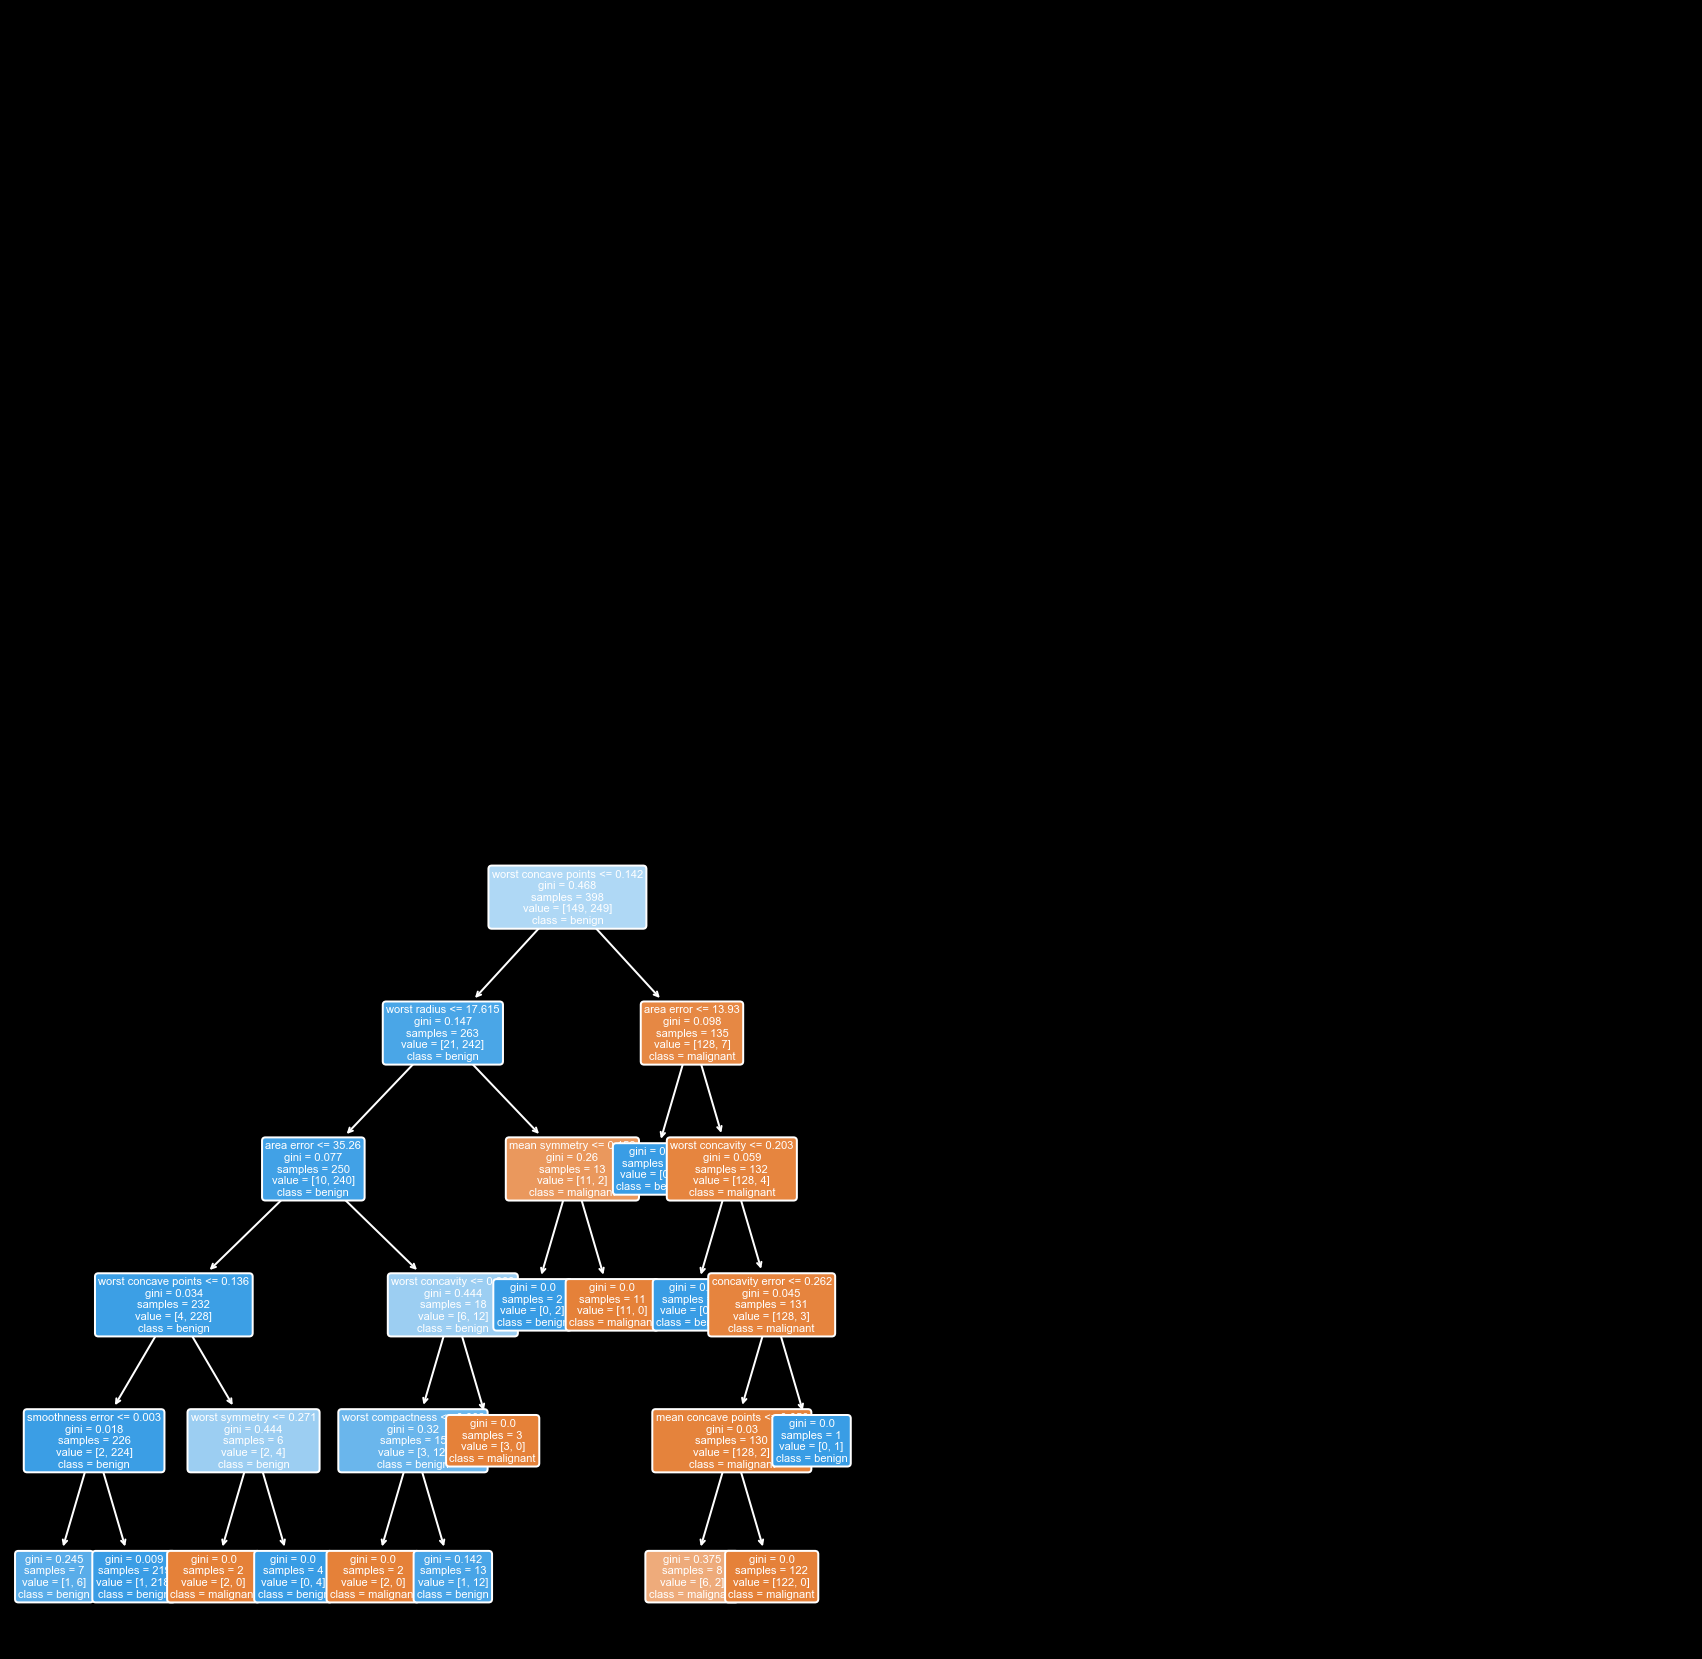

In [59]:
#Pintamos el árbol con scikitlearn
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.style.use('dark_background')


arbol = DecisionTreeClassifier(max_depth = 5)
arbol = arbol.fit(X_train, Y_train)

plt.figure(figsize=(15,15))
plot_tree(arbol, filled=True, feature_names=dic_tumor.feature_names, class_names=dic_tumor.target_names, rounded=True)
plt.show()

Primero pregunta sobre la peor concavidad de una clase de 398 casos, si la peor concavidad es menor o igual de 0.142 se considera benigno que son los 263 casos de la rama izquierda, mientras que si es mayor se considera maligno 135. Seguimos bajando en los nodos y nos encontramos dos preguntas diferentes para nuestro nuevo conjunto de muestras. La pregunta del nodo izquierdo es peor podemos ver que de los 263 casos que teniamos clasificados como benignos solo 13 acaban siendo malignos(ya que tienen este area > 952.9). La pregunta por parte del hijo derecho es el area de error vemos que de los 135 casos que consideraba malignos sólo 3 acaban siendo benignos. Sin duda la clase que mejor ha clasificado es la de benignos. 
Se puede observar que worst concave points tiene un poder discriminante muy grande.
Podemos observar que las preguntas que primero hace son las que mejores resultados han dado en el apartado uno a la hora de separar las clases, esto se debe a que los árboles intentan disminuir la entropía que tienen en cada uno de sus nodos así que cuanto mejor diferenciadas esten las clases mejores resultados obtendrá.

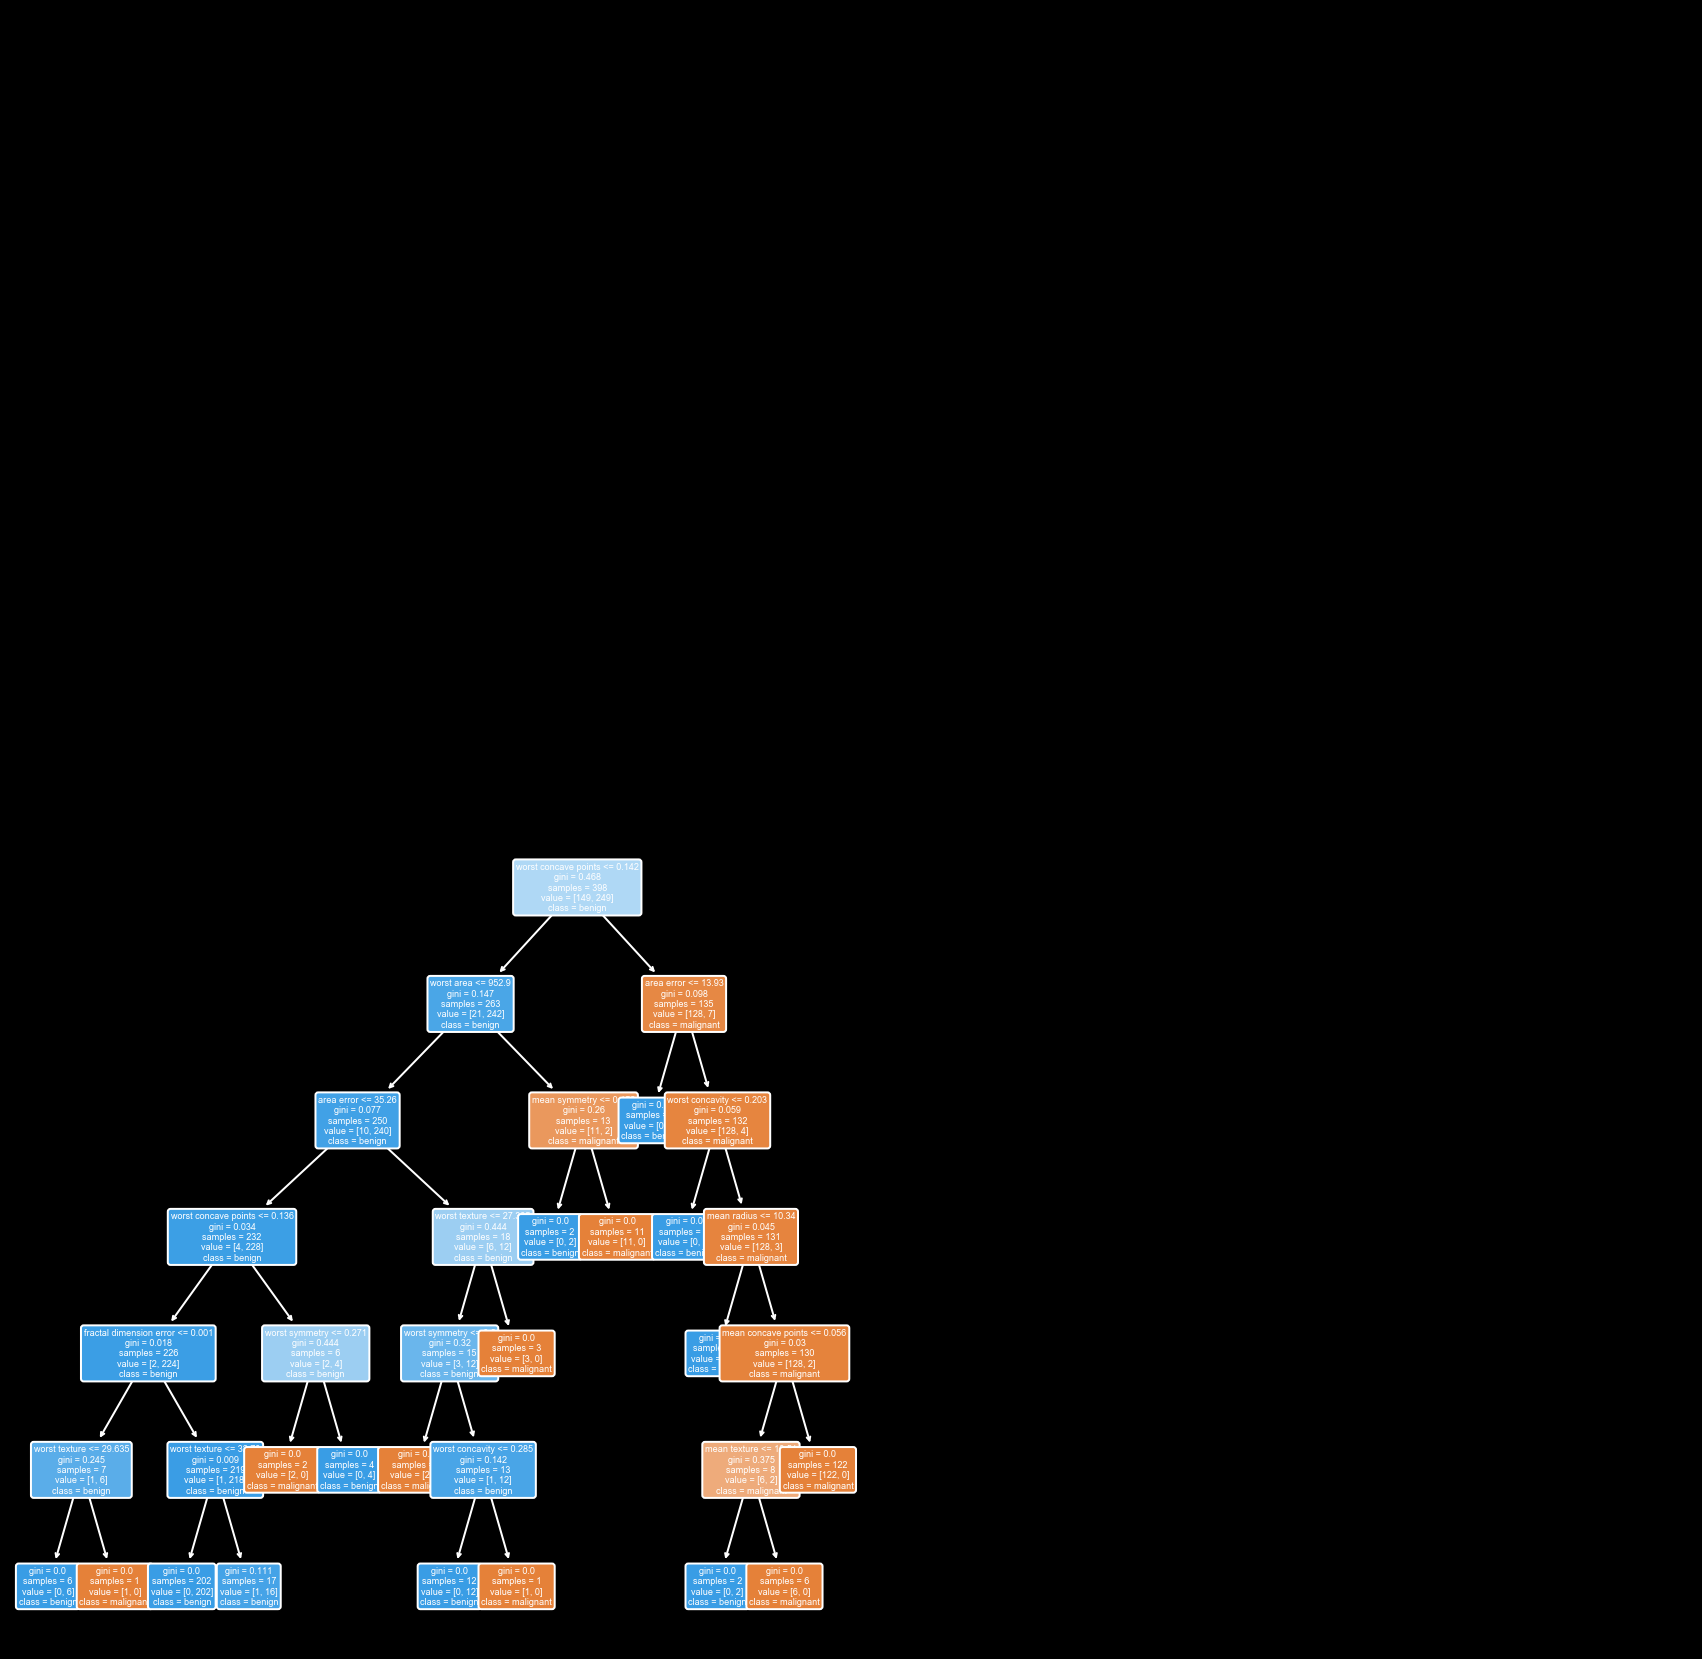

In [60]:
arbol = DecisionTreeClassifier(max_depth = 6)
arbol = arbol.fit(X_train, Y_train)

plt.figure(figsize=(15,15))
plot_tree(arbol, filled=True, feature_names=dic_tumor.feature_names, class_names=dic_tumor.target_names, rounded=True)
plt.show()

# Matriz de confusión

In [61]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix

Y_test_predicted =arbol.predict(X_test)
                            
confusion_matrix(Y_test, Y_test_predicted)

array([[ 59,   4],
       [  5, 103]], dtype=int64)

In [62]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_test_predicted))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        63
           1       0.96      0.95      0.96       108

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



Con la precisión podemos observar que el 91% de las veces que un tumor es benigno lo acierta mientras que si es maligno acierta el 96% de las veces.
El recall(exhaustividad) nos dice que el 6% de los tumores malignos/benignos se nos escapan. 

In [63]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=40, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    #Para centrar los valores dentro de la matriz
    plt.xlim(-0.5, 2-0.5)
    plt.ylim(2-0.5, -0.5)
    return ax

Normalized confusion matrix
[[0.93650794 0.06349206]
 [0.0462963  0.9537037 ]]


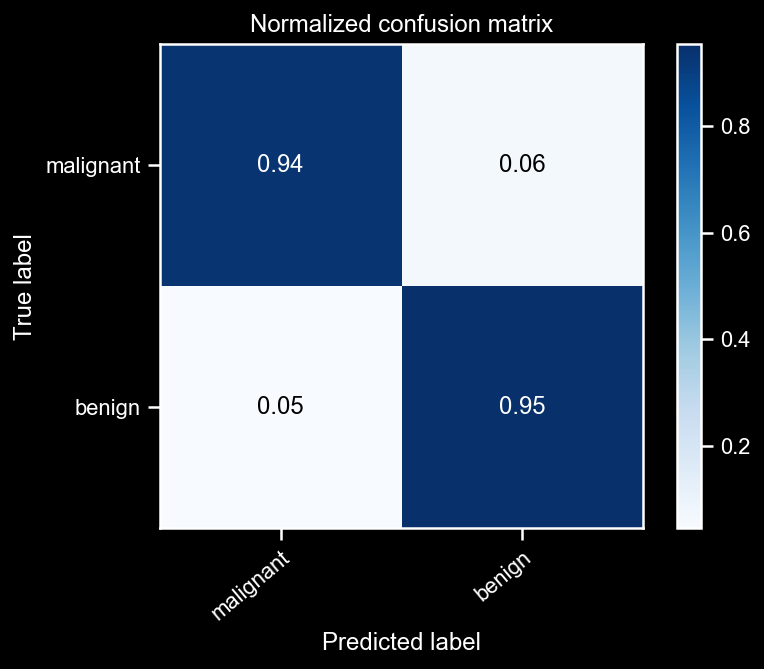

In [64]:
plot_confusion_matrix(Y_test, Y_test_predicted, dic_tumor.target_names, normalize=True)

# K-NN

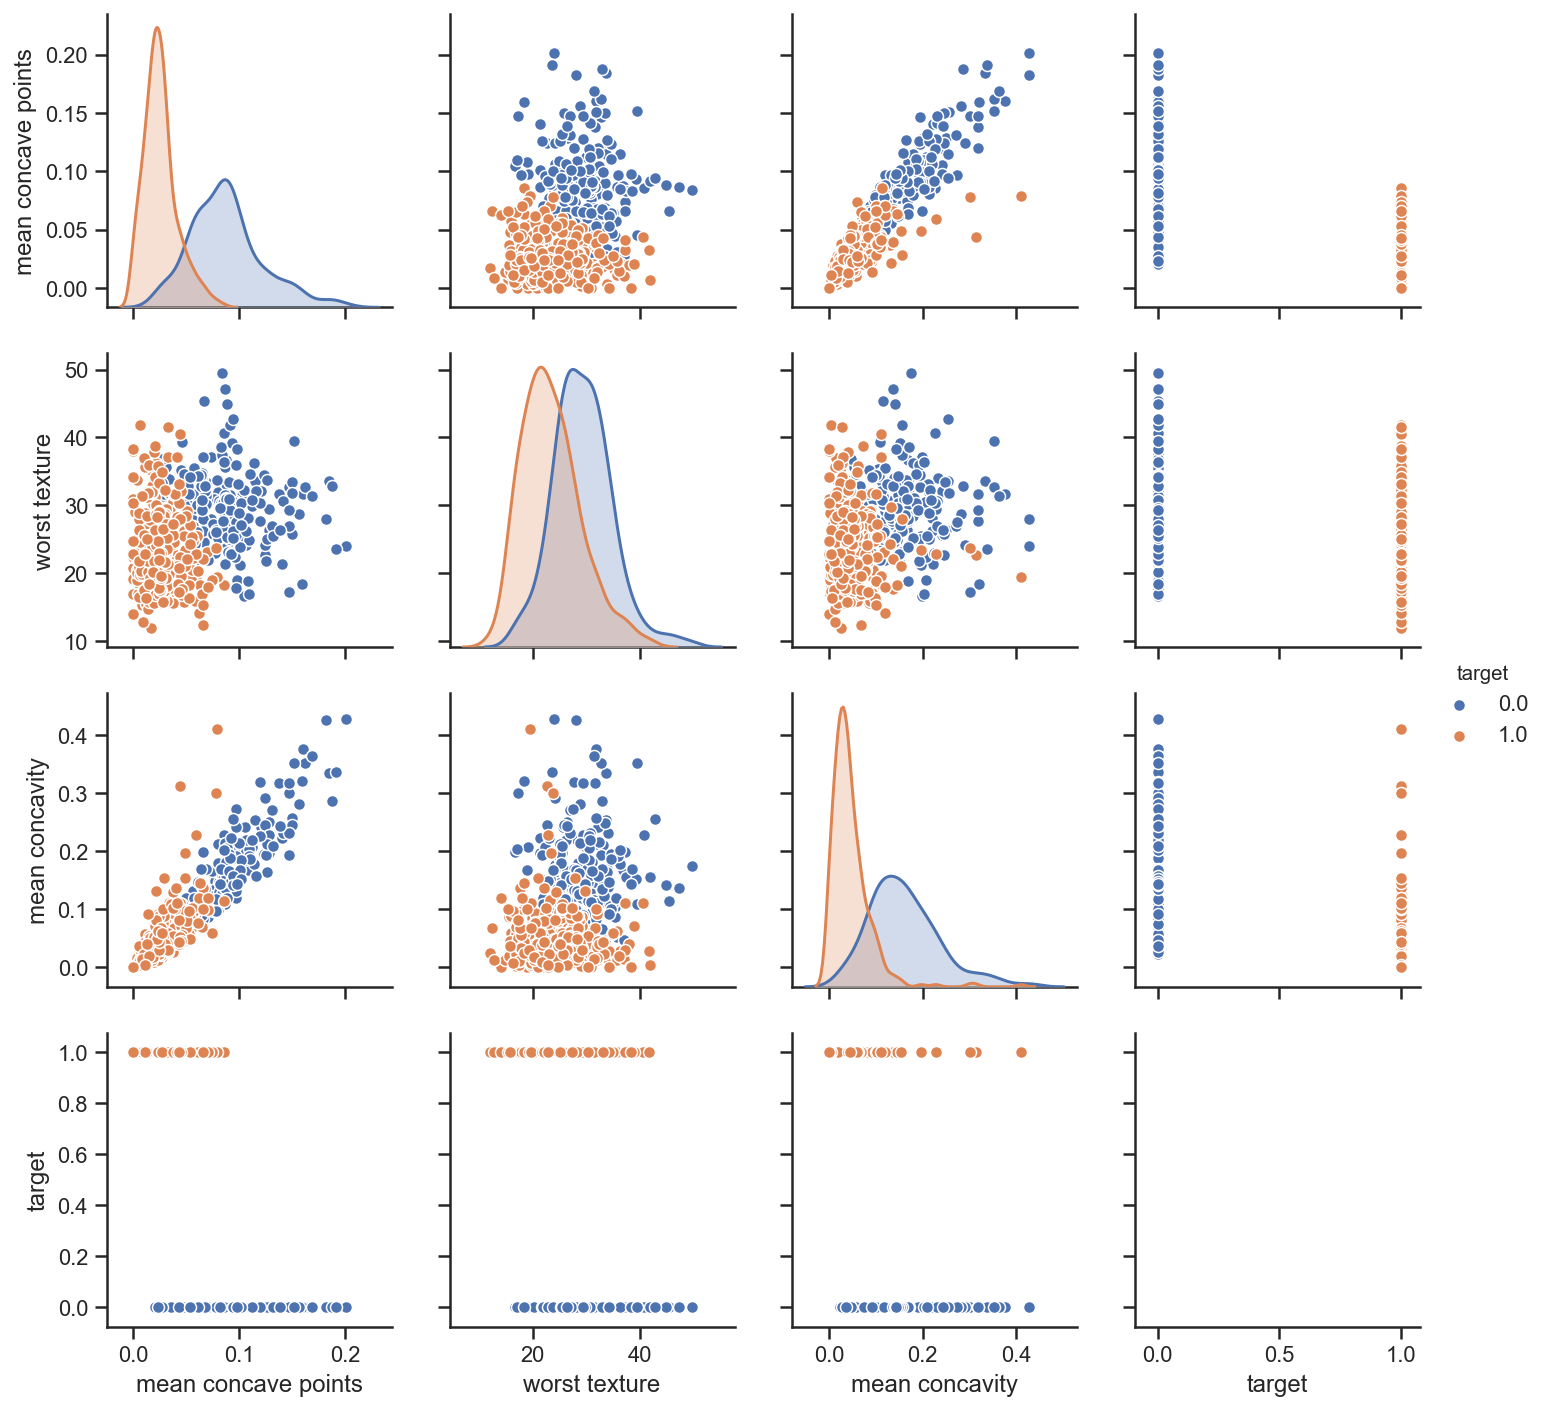

In [65]:
sns.set(style="ticks")
var = df[['mean concave points','worst texture','mean concavity','target']]

sns.pairplot(var, hue="target")

Se puede observar con los gráficos que todas las variables que se han seleccionado presentan bastante correlación con respecto a los resultado. Las dos variables que peor se comportan juntas son mean concave points y mean concavity.

In [34]:
# Como la proporción de clases a predecir está desbalanceada 
# usamos k-fold estratificado que mantiene la proporción en cada "fold"
from sklearn.model_selection import StratifiedKFold
from sklearn import neighbors

# Creamos n_splits particiones, barajando los datos (shuffle) y "fijando" la aleatoriedad 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)


train_k_results_mean=[]
train_k_results_std=[]
test_k_results_mean=[]
test_k_results_std=[]

rango_k=range(1,15)

k_values=rango_k

for k in rango_k: 
    clf = neighbors.KNeighborsClassifier(k, weights='distance', p=2)
    
    train_results=[]
    test_results=[]
    
    for train_index, test_index in skf.split(df, dic_tumor.target):    
        X_train, X_test = dic_tumor.data[train_index], dic_tumor.data[test_index]
        y_train, y_test = dic_tumor.target[train_index], dic_tumor.target[test_index]
        
        clf.fit(X_train, y_train)
        
        train_results.append(clf.score(X_train, y_train))
        test_results.append(clf.score(X_test, y_test))
    
    
    train_k_results_mean.append(np.mean(train_results))
    train_k_results_std.append(np.std(train_results))
    test_k_results_mean.append(np.mean(test_results))
    test_k_results_std.append(np.std(test_results))

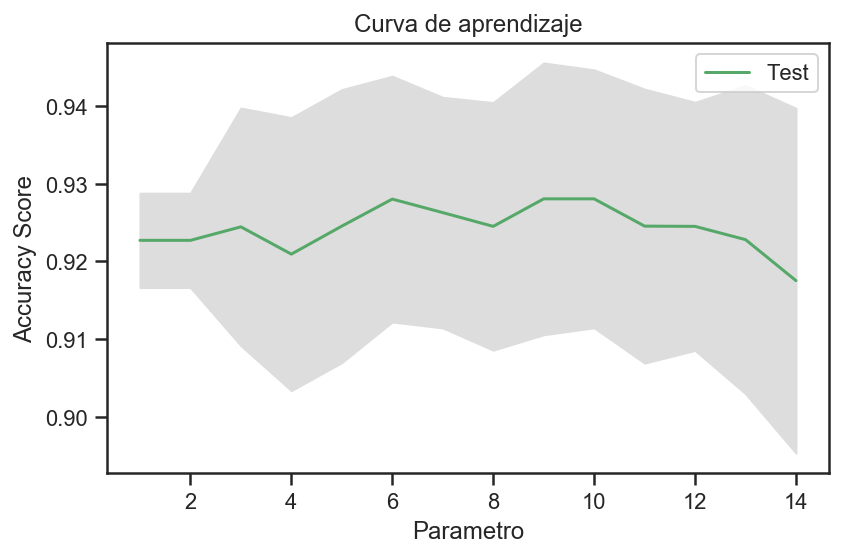

In [35]:
#Dibujar
    
# Dibujamos la línea con la accuracy (exactitud) en el test
# No dibujamos la de entrenamiento porque en el k-NN está siempre en 100
#plt.plot(k_values, train_k_results_mean, color="r",  label="Training")
plt.plot(k_values, test_k_results_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit=np.array(test_k_results_mean)-np.array(test_k_results_std)
upper_limit=np.array(test_k_results_mean)+np.array(test_k_results_std)
plt.fill_between(k_values, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
%config InlineBackend.figure_format ='retina'
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Se puede observar que el valor optimo de k es 6 que es donde se encuentra el mejor accurrency, no es un modelo muy complicado ya que no tiene una k excesivamente alta.

# Normalizacion

En principio se puede observar que los datos se toman en diferentes escalas por lo que es conveniente reescalar los datos a la hora de analizar su distancia.

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(dic_tumor.data)
breast_scaled=scaler.transform(dic_tumor.data)

In [37]:
# Creamos n_splits particiones, barajando los datos (shuffle) y "fijando" la aleatoriedad 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

train_k_results_mean=[]
train_k_results_std=[]
test_k_results_mean=[]
test_k_results_std=[]

rango_k=range(1,15)

k_values=rango_k

for k in rango_k: 
    # Creamos el clasificador de k-NN
    #   Podemos fijar los pesos como 'uniform' o inv. proporcionales a la distancia 'distance'
    #   El parámetro p es el orden de la métrica de Minkowski (1 Manhattan, 2 Euclídea)
    clf = neighbors.KNeighborsClassifier(k, weights='distance', p=2)
    
    train_results=[]
    test_results=[]
    
    for train_index, test_index in skf.split(breast_scaled, dic_tumor.target):
        
        X_train, X_test = breast_scaled[train_index], breast_scaled[test_index]
        y_train, y_test = dic_tumor.target[train_index], dic_tumor.target[test_index]
        
        clf.fit(X_train, y_train)
        
        train_results.append(clf.score(X_train, y_train))
        test_results.append(clf.score(X_test, y_test))
    
    
    train_k_results_mean.append(np.mean(train_results))
    train_k_results_std.append(np.std(train_results))
    test_k_results_mean.append(np.mean(test_results))
    test_k_results_std.append(np.std(test_results))

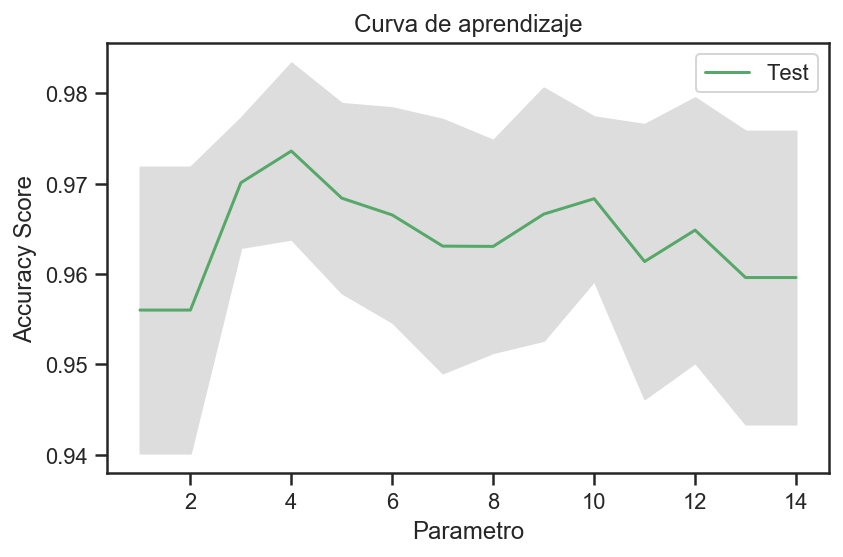

In [38]:
# Dibujamos la línea de la exactitud media en las partes de test
#plt.plot(k_values, train_k_results_mean, color="r",  label="Training")
plt.plot(k_values, test_k_results_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit=np.array(test_k_results_mean)-np.array(test_k_results_std)
upper_limit=np.array(test_k_results_mean)+np.array(test_k_results_std)
plt.fill_between(k_values, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Podemos observar que con valores mucho más pequeños se obtiene un mejor accuracy que antes, el mejor valor de k lo podemos encontrar en k = 4, ya que alcanza 0.97 de accuracy mientras que antes estaba en torno a 0.93, haciendo el modelo mucho más simple ya que la k es menor

# Análisis de los resultados

In [39]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Importamos también un asistente para hacer la validación cruzada más sencilla
from sklearn.model_selection import cross_validate

In [40]:
scoring_metrics = ['precision_weighted', 'recall_weighted',]

clf = neighbors.KNeighborsClassifier(4, weights='distance', p=2)


scores = cross_validate(clf, df, dic_tumor.target,
                         scoring=scoring_metrics, cv=5,
                         return_train_score=False)

print('Precisión : ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad : ',np.mean(scores['test_recall_weighted']))

Precisión :  0.9204740592843782
Exhaustividad :  0.9192304732589458


Comparando la precisión y la exhaustividad se puede observar que dan casi los mismo resultados.